In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

URL = "https://www.ssa.gov/oact/solvency/provisions/investequities.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

# Print out the elements that contain the matching text
matching_items = []
element_list = soup.find_all('a')
for element in element_list:
    if 'Detailed single year tables' in element.get_text():
        matching_items.append(element['href'].replace('./', ''))
print(matching_items)


dfs = []

for element in matching_items:
    URL = "https://www.ssa.gov/oact/solvency/provisions/" + str(element)
    print(URL)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
#     print(soup)
    tbl = soup.find("table")
    data_frame = pd.read_html(str(tbl))[0]
    data_frame.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data_frame.columns]

    dfs.append(data_frame)
    print(data_frame.columns)

i = 0
for df in dfs:
    name = matching_items[i].split('/')[1]
    df.to_csv('/Users/ben/Documents/school/cdj/dfs/' + name + ".csv", sep='\t')
    i += 1

arrays = []
for df in dfs:
    arrays.append(df['Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance'].to_numpy())

new_arrays = []
for array in arrays:
    proposal_index = np.where(array == 'Proposal')[0]
    if proposal_index.size > 0:
        new_arrays.append(array[:proposal_index[0]])
arrays = new_arrays

['tables/table_run152.html', 'tables/table_run153.html', 'tables/table_run061.html', 'tables/table_run154.html', 'tables/table_run061a.html', 'tables/table_run155.html', 'tables/table_run061b.html']
https://www.ssa.gov/oact/solvency/provisions/tables/table_run152.html


/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Calendar year Unnamed: 0_level_3 Years',
       'Proposal Expressed as a percentage of  current-law taxable payroll Cost rate Proposal Cost rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Income rate Proposal Income rate',
       'Proposal Expressed as a percentage of  current-law taxable payroll Annual balance Proposal Actuarial balance',
       'Proposal Unnamed: 4_level_1 Unnamed: 4_level_2 Proposal Unnamed: 4_level_4',
       'Proposal Trust fund  ratio as of January 1 Trust fund  ratio as of January 1 Proposal Year of reserve  depletion1',
       'Unnamed: 6_level_0 Unnamed: 6_level_1 Unnamed: 6_level_2 Unnamed: 6_level_3 Unnamed: 6_level_4',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Cost rate Change from Current Law Cost rate',
       'Change from Current Law Expressed as a percentage of current-law taxable payroll Income rate Change from Current Law Inco

/var/folders/vs/qy0cxq3x47v2gjsbgwxmt14r0000gn/T/ipykernel_12112/1540132672.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_frame = pd.read_html(str(tbl))[0]


In [5]:
for array in arrays:
    print(array)

['-1.68' '-2.11' '-2.13' '-2.25' '-2.28' '-2.31' '-2.35' '-2.37' '-2.38'
 '-2.40' '-2.50' '-2.60' '-2.69' '-2.79' '-2.86' '-2.93' '-3.00' '-3.05'
 '-3.10' '-3.14' '-3.18' '-3.21' '-3.24' '-3.27' '-3.31' '-3.35' '-3.40'
 '-3.44' '-3.50' '-3.56' '-3.62' '-3.69' '-3.76' '-3.84' '-3.92' '-4.00'
 '-4.08' '-4.15' '-4.22' '-4.28' '-4.34' '-4.40' '-4.46' '-4.52' '-4.58'
 '-4.64' '-4.70' '-4.77' '-4.82' '-4.88' '-4.93' '-4.98' '-5.02' '-5.05'
 '-5.07' '-5.08' '-5.08' '-5.07' '-5.06' '-5.03' '-5.00' '-4.96' '-4.91'
 '-4.86' '-4.80' '-4.75' '-4.70' '-4.65' '-4.62' '-4.60' '-4.58' '-4.58'
 '-4.59' '-4.61' '-4.64' '-4.67']
['-1.68' '-2.11' '-2.13' '-2.25' '-2.28' '-2.31' '-2.35' '-2.37' '-2.38'
 '-2.40' '-2.50' '-2.60' '-2.69' '-2.79' '-2.86' '-2.93' '-3.00' '-3.05'
 '-3.10' '-3.14' '-3.18' '-3.21' '-3.24' '-3.27' '-3.31' '-3.35' '-3.40'
 '-3.44' '-3.50' '-3.56' '-3.62' '-3.69' '-3.76' '-3.84' '-3.92' '-4.00'
 '-4.08' '-4.15' '-4.22' '-4.28' '-4.34' '-4.40' '-4.46' '-4.52' '-4.58'
 '-4.64' '-4.70' 

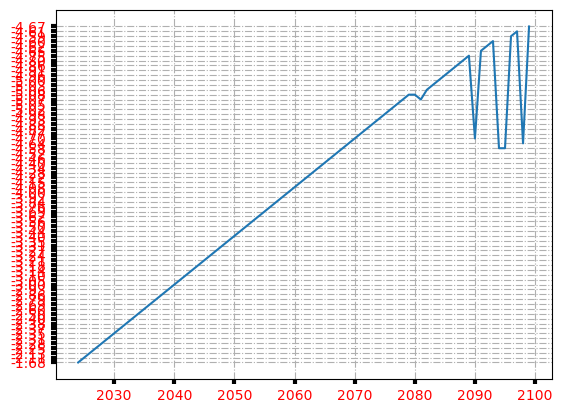

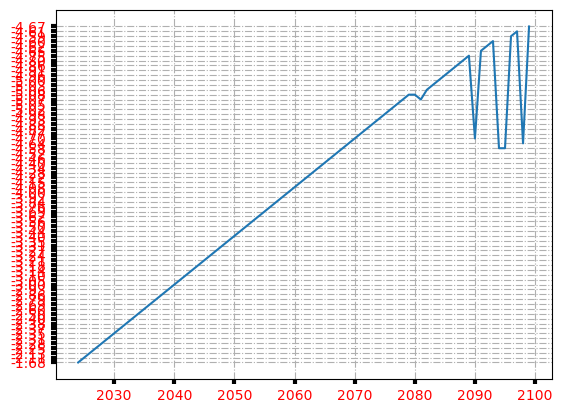

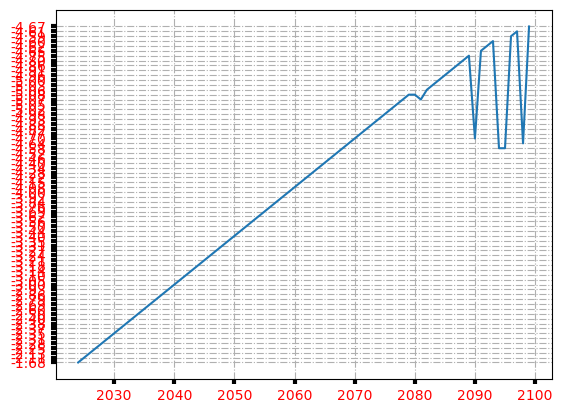

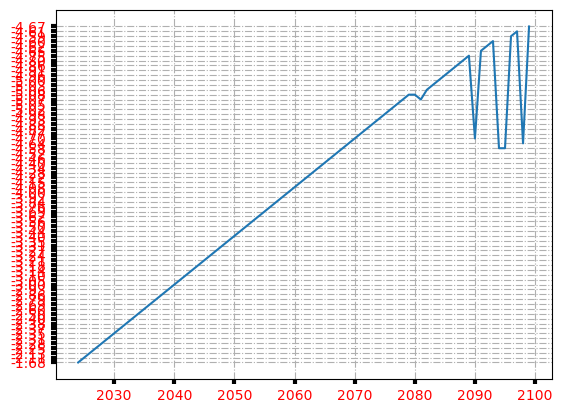

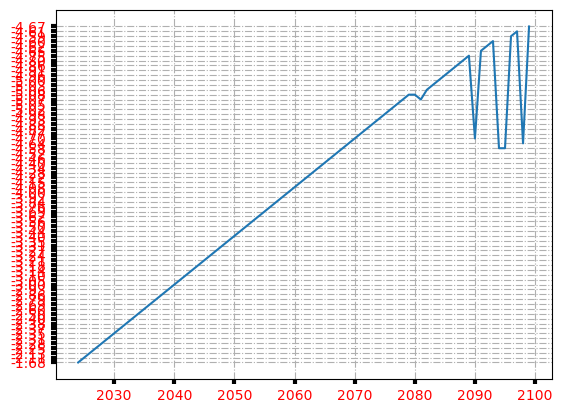

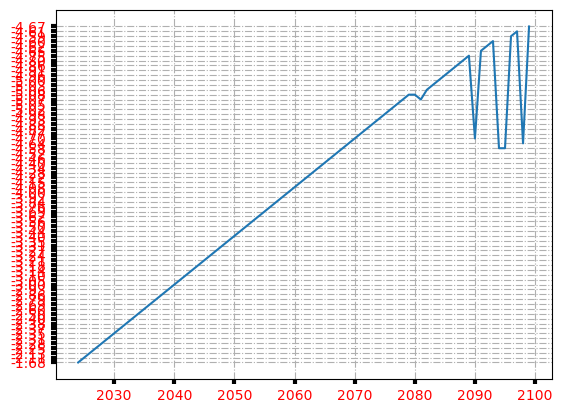

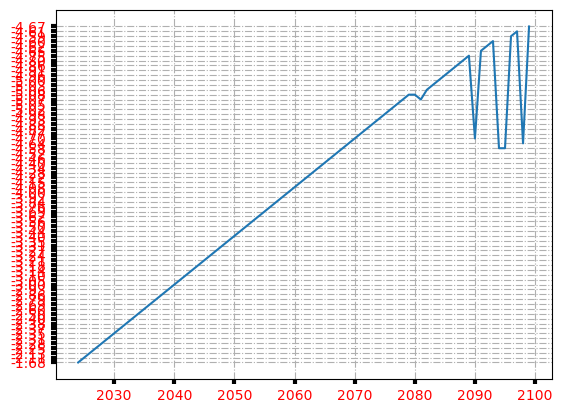

In [ ]:
for array in arrays:
    # Generate 't' dynamically to match the length of 'array'
    t = np.linspace(2024, 2099, len(array))
    
    # Create the plot
    fig, ax = plt.subplots()
    ax.invert_yaxis()
    ax.plot(t, array)

    # Customize the plot appearance
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='r', labelsize='medium', width=3)

    # Show the plot
    plt.show()